In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns 
import math
import time 
from matplotlib import ticker

# from sklearn.preprocessing import MinMaxScaler
# from datetime import datetime
# from datetime import timedelta
from tqdm import tqdm 

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.layers import Dense, Activation, Dropout

import ast

from matplotlib import  font_manager
my_font = font_manager.FontProperties(fname="/System/Library/Fonts/Hiragino Sans GB.ttc")

# 定价指导模型

In [3]:
np.arange(-3,0,0.45)

array([-3.  , -2.55, -2.1 , -1.65, -1.2 , -0.75, -0.3 ])

## 以真果粒为例
真果粒保质期：6个月
【假设】进货周期为：每1个月一次

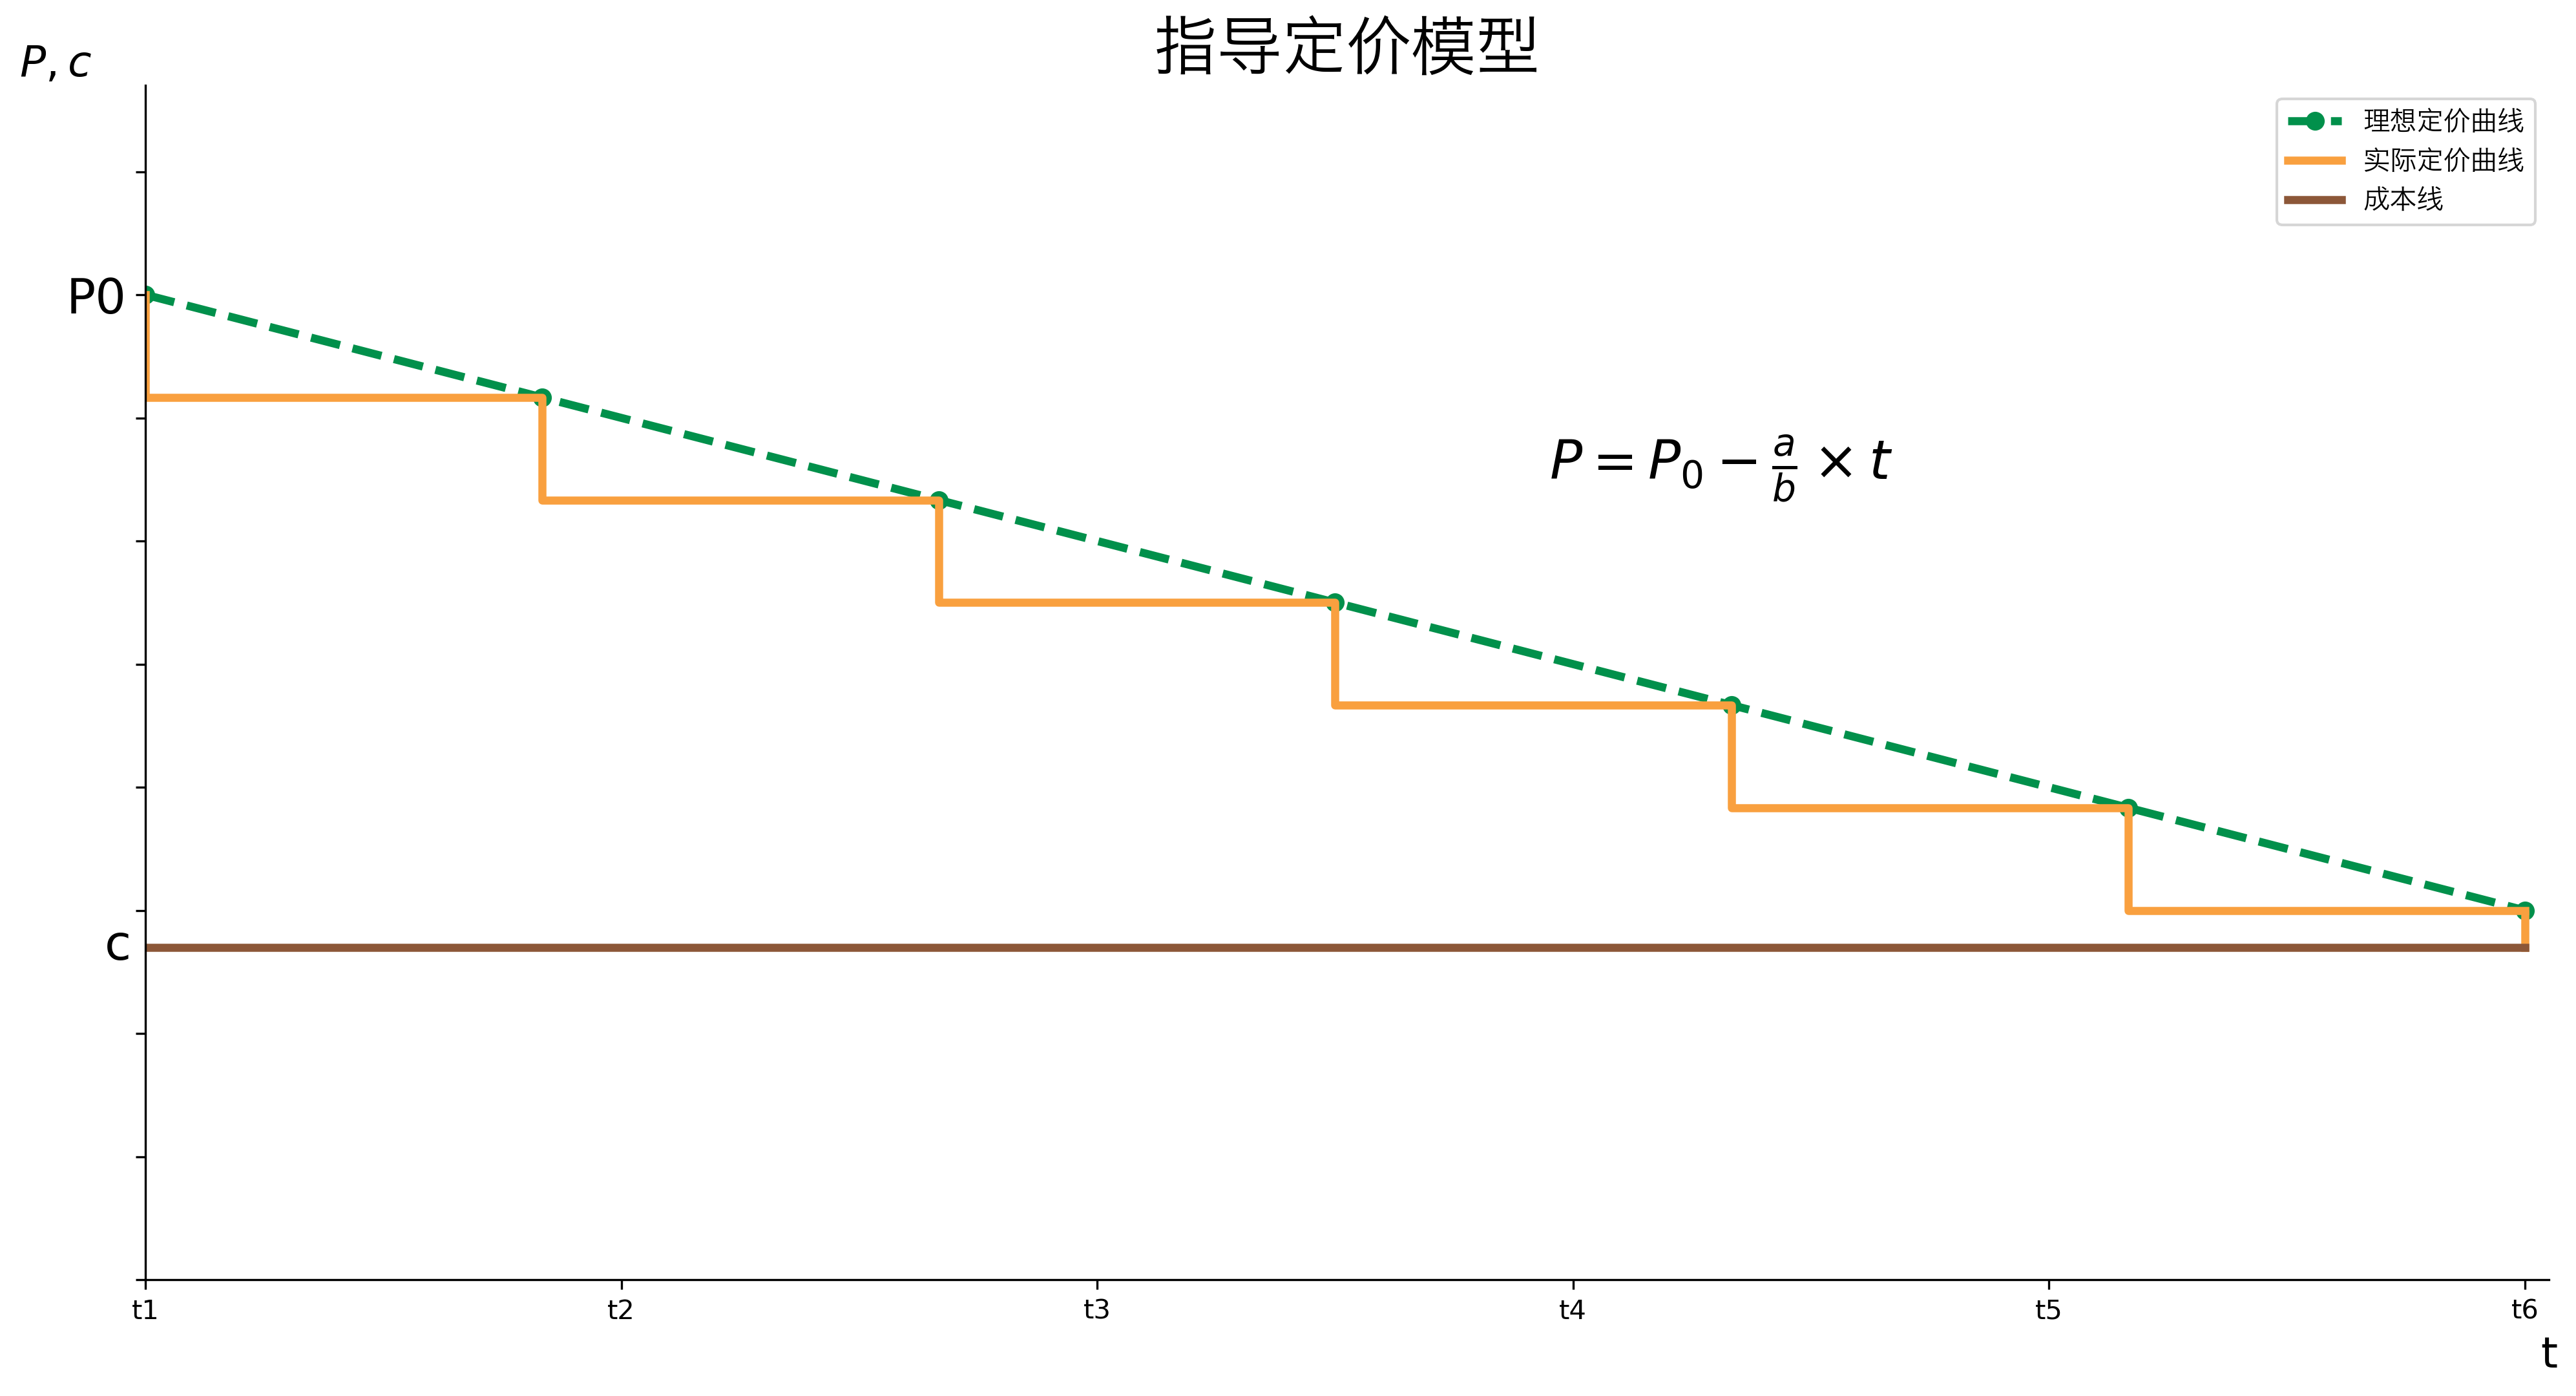

In [114]:
plt.figure(figsize=(16,8),dpi=300)

x=np.linspace(0,100,7)
y= 50 -0.5*x

ax = plt.gca()#获得当前axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.text(59,35,r'$P=P_{0}-\frac{a}{b} \times t$',
         fontsize=20)

plt.plot(x,y,'--',color='#01904B',linewidth=3,marker='.',markeredgewidth=4,label='理想定价曲线')
plt.step(x,y,where='pre',color='#F9A03F',linewidth=3,label='实际定价曲线')
plt.plot([100,100,100,100,100,100,100],np.arange(-3,0,0.45),color='#F9A03F',linewidth=3)
plt.plot(x,np.zeros(7)-3,color='#8C5738',linewidth=3,label='成本线')

plt.xlim(0,101)
plt.ylim(-30,67)
plt.xticks(np.linspace(0,100,6),['t{}'.format(i) for i in range(1,7)])
plt.yticks(np.linspace(-30,60,10),[' ',' ',' ',' ',' ',' ',' ',' ','P0',' '],fontsize=18)
plt.text(-1.7,-4,'c',fontsize=18)
plt.title("指导定价模型",fontproperties=my_font,fontsize=24)

plt.xlabel('t',x=1,fontsize=16)
plt.ylabel(r'$P,c$',y=1,fontsize=16,rotation='horizontal')

plt.legend(prop=my_font,fontsize='large',loc='best')

plt.savefig('指导定价模型.jpg')
plt.show()

# 保险数
通过展示概率模型来解释随机造访建模过程，最后得到可能的保险数大小。
## 泊松分布
> Poisson分布，是一种统计与概率学里常见到的离散概率分布.泊松分布的参数λ是单位时间(或单位面积)内随机事件的平均发生次数。 泊松分布适合于描述单位时间内随机事件发生的次数。

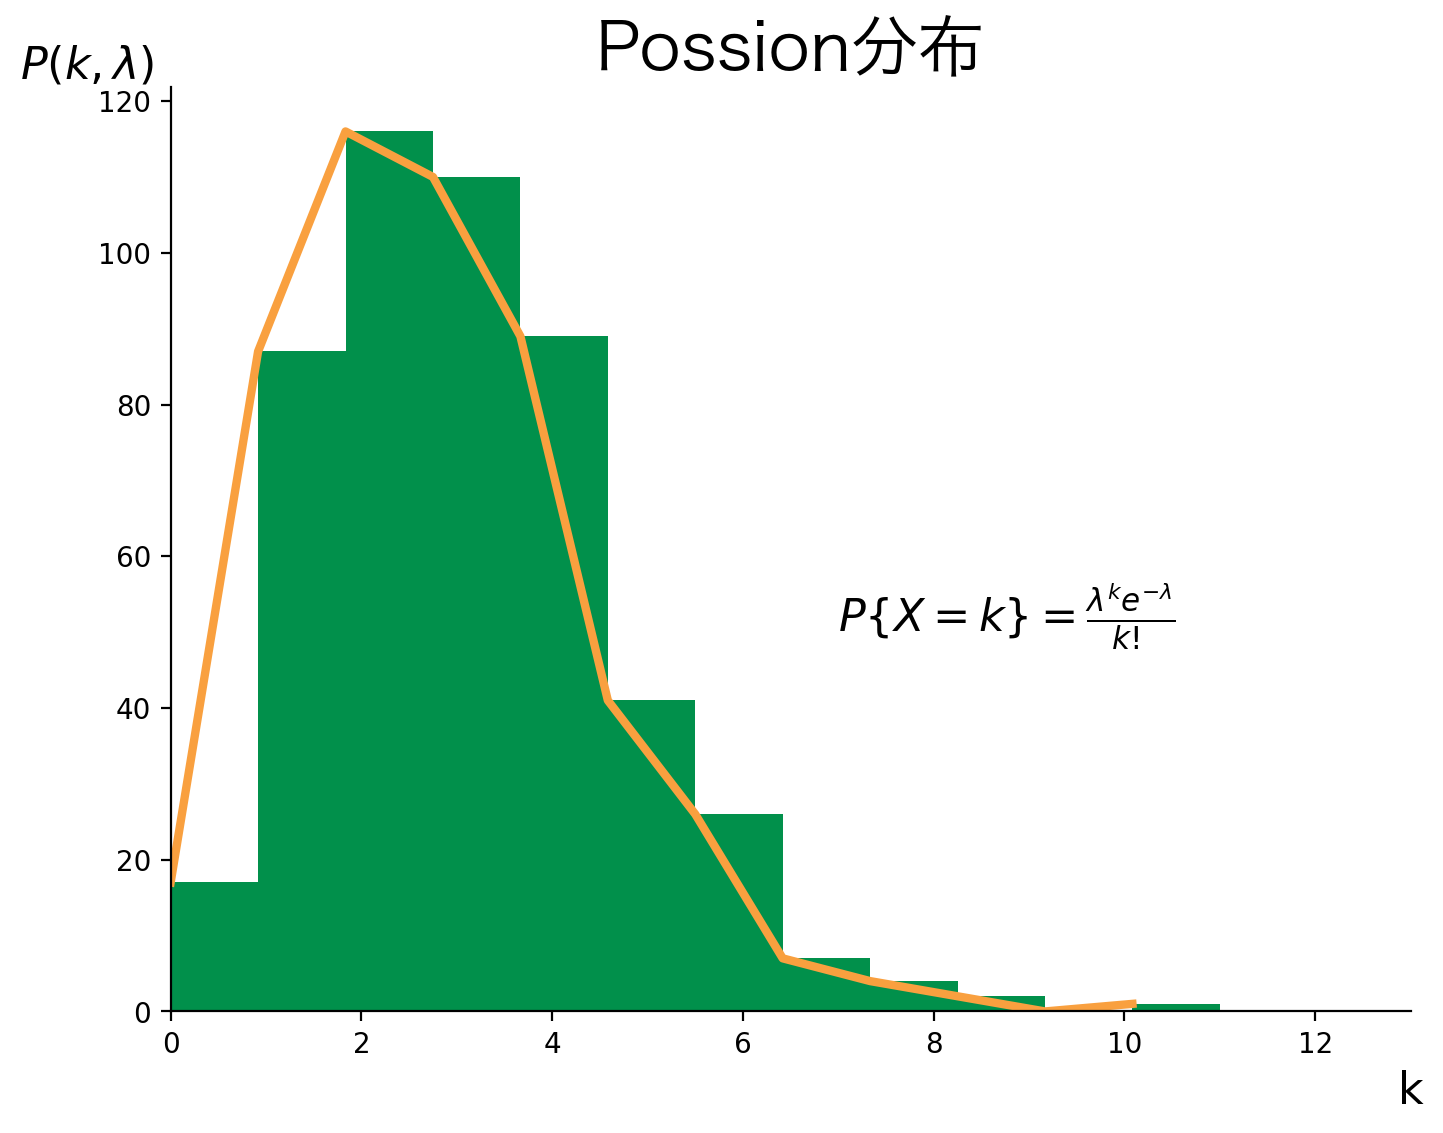

In [124]:
x = np.random.poisson(lam = 3, size = 500)
pillar = 12

plt.figure(figsize=(8,6),dpi=200)
a = plt.hist(x, pillar, color = '#01904B')

ax = plt.gca()#获得当前axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(a[1][0:pillar], a[0],color='#F9A03F',linewidth=3)
plt.xlim(0,13)
plt.text(7,50,r'$P\{X = k\} = \frac{\lambda ^{k} e^{-\lambda}}{k!}$',fontsize=16)
plt.xlabel('k',x=1,fontsize=16)
plt.ylabel(r'$P(k,\lambda)$',y=1,fontsize=16,rotation='horizontal')
plt.title('Possion分布',fontproperties=my_font,fontsize=24)

plt.savefig('Possion分布.jpg')
plt.show()

## gamma分布
> 伽玛分布（Gamma Distribution）是统计学的一种连续概率函数

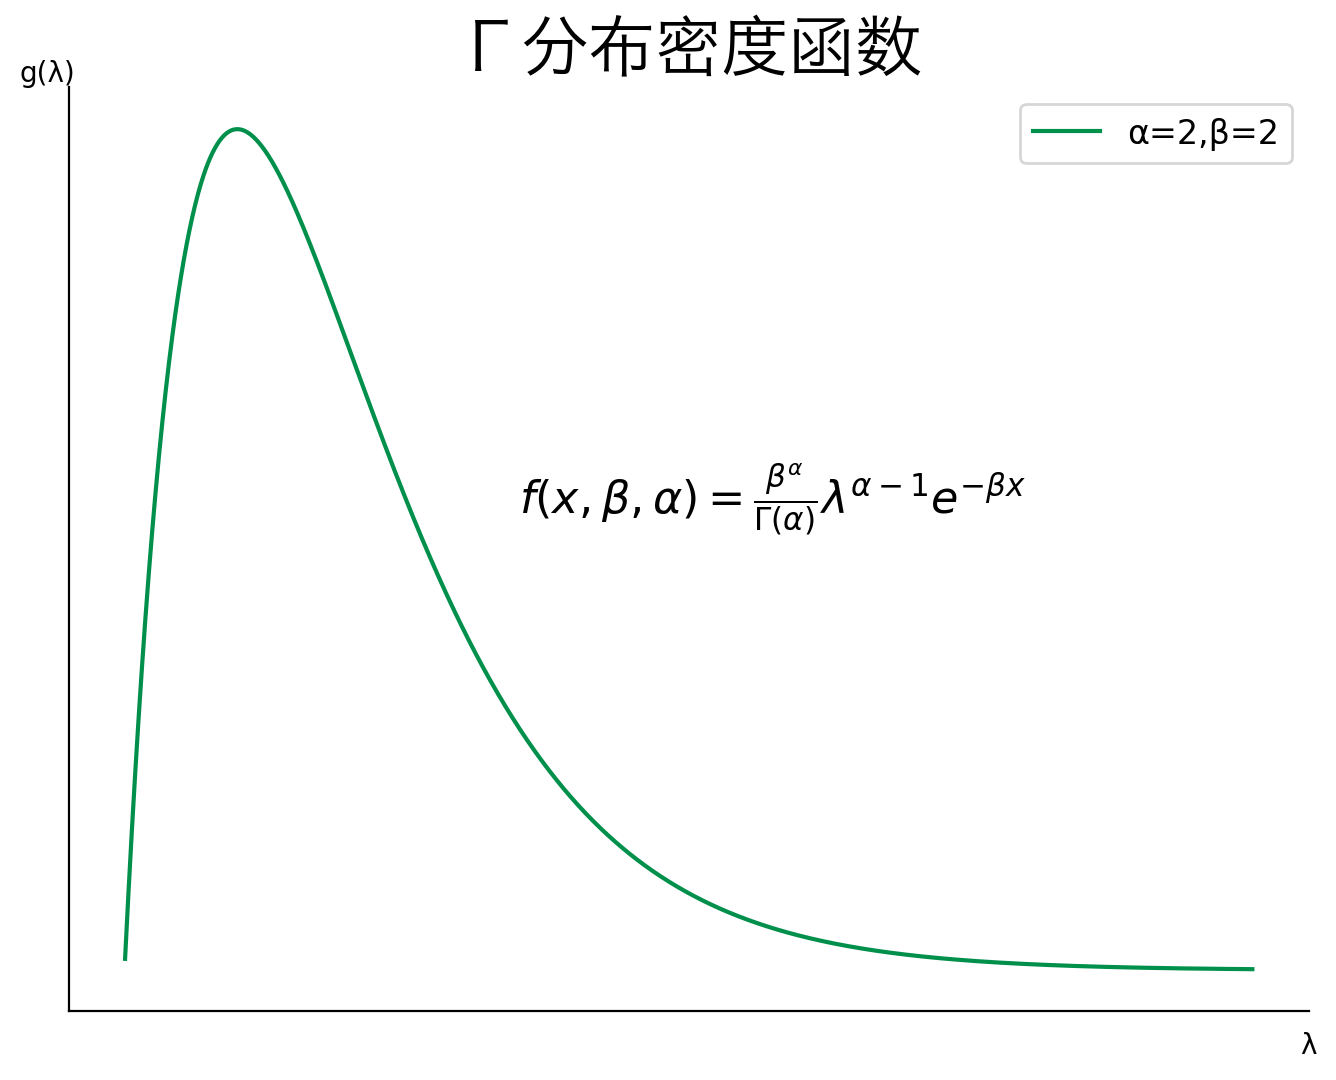

In [146]:
fig=plt.figure(figsize=(8,6),dpi=200)
ax1 = fig.add_subplot(1,1,1)
x = np.arange(0.01,20,0.01)

ax = plt.gca()#获得当前axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

y2 = st.gamma.pdf(x,2,scale=2)

ax1.plot(x,y2,label='α=2,β=2',color='#01904B')
plt.text(7,0.1,r'$f(x,β,α)=\frac{β^{α}}{Γ(α)}\lambda ^{α-1}e^{-βx}$',fontsize=16)

ax1.set_xlabel('λ',x=1)
ax1.set_ylabel('g(λ)',y=1,rotation='horizontal')
ax1.set_title('Γ分布密度函数',fontproperties=my_font,fontsize=24)
ax1.legend(loc='best',fontsize='large')

ax1.set_xticks([])
ax1.set_yticks([])

plt.savefig('Γ分布密度函数')

plt.show()

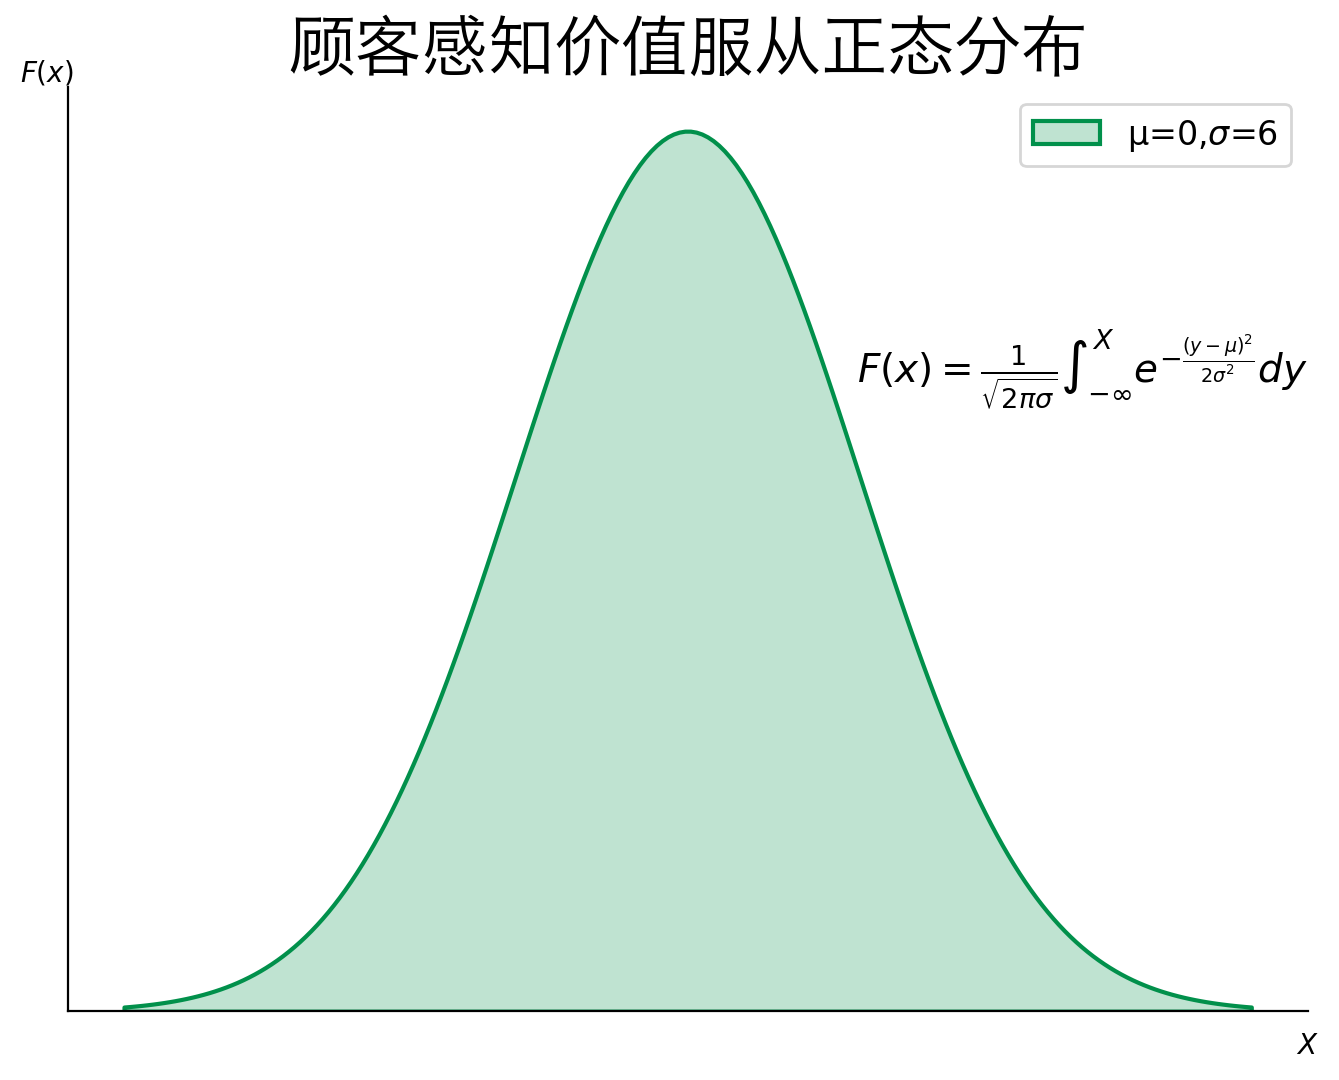

In [162]:
u = 0  
u01 = -2
sig = math.sqrt(0.2)  # 标准差δ
x = np.linspace(u - 3 * sig, u + 3 * sig, 50)

plt.figure(figsize=(8,6),dpi=200)

ax = plt.gca()#获得当前axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
sns.kdeplot(x, bw_method=5,shade=True,color='#01904B',linewidth=1.5,label='μ=0,$\sigma$=6')

ax.set_xlabel('$X$',x=1)
ax.set_ylabel('$F(x)$',y=1,rotation='horizontal')
ax.set_title('顾客感知价值服从正态分布',fontproperties=my_font,fontsize=24)

plt.text(4,0.07,r'$F(x) = \frac{1}{\sqrt{2\pi \sigma}}\int_{-\infty}^{X}e^{-\frac{(y-\mu)^{2}}{2\sigma ^{2}}}dy$',
        fontproperties=my_font,fontsize=14)

ax.set_xticks([])
ax.set_yticks([])

plt.legend(fontsize='large')
plt.savefig('顾客感知价值服从正态分布.jpg')
plt.show()

In [22]:
def factorial(n):
    if n==1:
        return n
    else:
        return n*factorial(n-1)
    

5
120


In [ ]:
from scipy.stats import rv_continuous
import matplotlib.pyplot as plt
import numpy as np
class MyDistribution(rv_continuous):
    def _pdf(self, x):#概率密度分布函数
        return (factorial(m+α-1)/(factorial(m)*factorial(α-1))*(β*t*))
distribution = MyDistribution()
xlist=np.linspace(-8,8,300)
ylist=distribution.pdf(xlist)
samples=distribution.rvs(size=200);#取200次样

fig,ax=plt.subplots(figsize=(8,6))
ax.plot(xlist,ylist,lw=3,color='red',label="$\mathrm{ideal}$");
ax.hist(samples,color='blue',density=True, bins=np.arange(-8,8,0.25), histtype='barstacked', rwidth=0.9,label=r"$\mathrm{samples}$")
ax.legend(fontsize=20);
ax.set_xlabel(r"$x$",size=25)
ax.set_ylabel(r"$\mathrm{PDF}$",size=20)
ax.set_xlim(-8,8);
ax.tick_params(axis='both',direction='in',width=1.3,length=3,top=1,right=1,labelsize=20,pad=2)
fig.tight_layout();
fig.show();


# LSTM
[b站链接](https://www.bilibili.com/video/BV1Ui4y1j7BH/?spm_id_from=333.337.search-card.all.click&vd_source=9909de04169ce5f850fcf17f0826b816)
## 图表

In [21]:
df= pd.read_csv('/Users/improvise/Desktop/ParMet_Lab/2022.09蒙牛校园创新大赛/初赛/LSTM/数据2/3_38#CPI_2.csv',
               skiprows=1)
df

,日期,开盘,最高,最低,收盘,成交量,成交额
0,2000/1/31,99.8,99.8,99.8,99.8,0.0,0.0
1,2000/2/29,100.7,100.7,100.7,100.7,0.0,0.0
2,2000/3/31,99.8,99.8,99.8,99.8,0.0,0.0
3,2000/4/30,99.7,99.7,99.7,99.7,0.0,0.0
4,2000/5/31,100.1,100.1,100.1,100.1,0.0,0.0
...,...,...,...,...,...,...,...
267,2022/4/30,102.1,102.1,102.1,102.1,0.0,0.0
268,2022/5/31,102.1,102.1,102.1,102.1,0.0,0.0
269,2022/6/30,102.5,102.5,102.5,102.5,0.0,0.0
270,2022/7/31,102.7,102.7,102.7,102.7,0.0,0.0


In [5]:
#30是神经元数目
lstm = layers.LSTM(30)

In [6]:
#x.shape:[batch,lens,features]
x = tf.random.uniform((32,50,40))

In [7]:
y=lstm(x)
print(y.shape)

(32, 30)


```



```

In [8]:
#新传入的参数会传出c和h
lstm2 = layers.LSTM(30,return_state=True)

In [9]:
y,state_h,state_c= lstm2(x)
print(y.shape)
print(state_h.shape)
print(state_c.shape)

(32, 30)
(32, 30)
(32, 30)


```


```

In [10]:
#输入几个x就输出几个y
lstm3 = layers.LSTM(30,return_sequences=True)

In [11]:
y = lstm3(x)
print(y.shape)

(32, 50, 30)


```



```
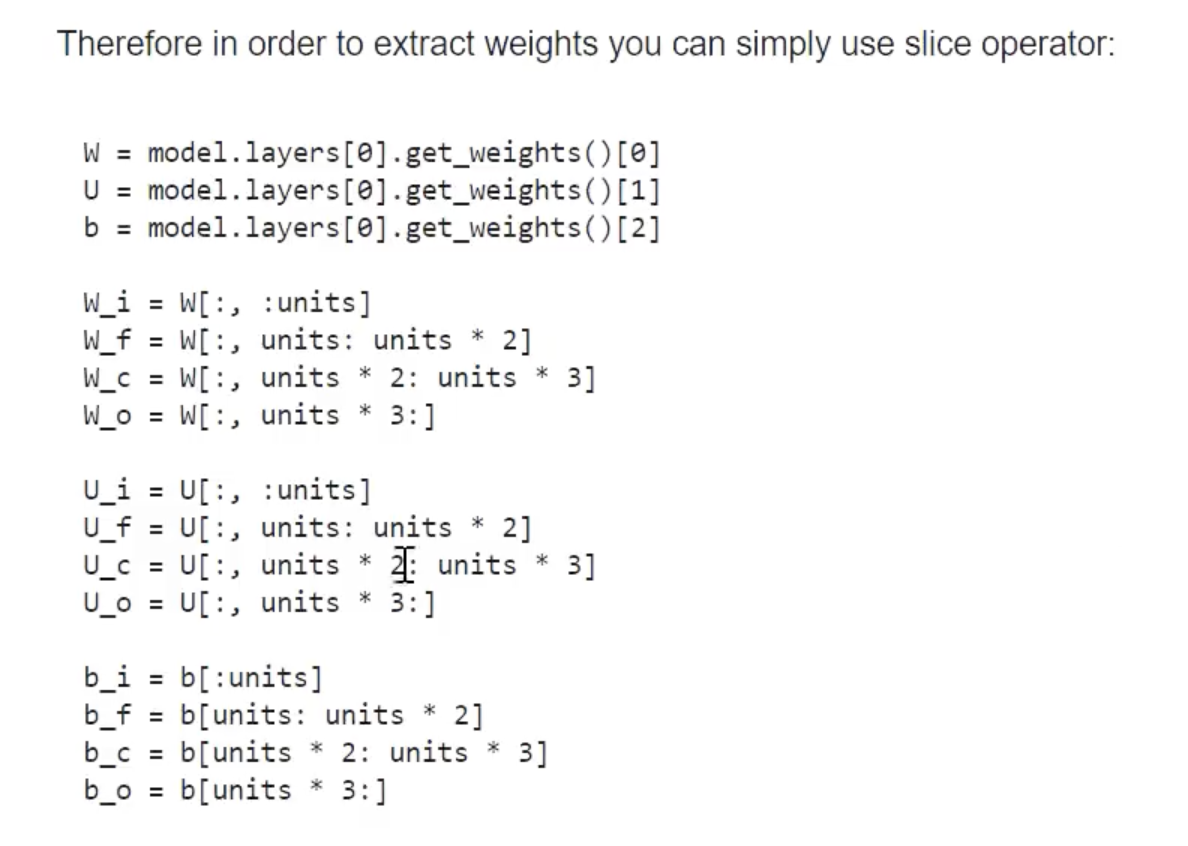

In [12]:
for weight in lstm.variables:
    print(weight.name,weight.shape)

lstm/lstm_cell/kernel:0 (40, 120)
lstm/lstm_cell/recurrent_kernel:0 (30, 120)
lstm/lstm_cell/bias:0 (120,)


In [13]:
gru = layers.GRU(30,return_state=True,return_sequences=True)
y, hidden= gru(x)

In [14]:
print(y.shape)
print(hidden.shape)

(32, 50, 30)
(32, 30)


## 双向LSTM

In [15]:
bilstm = layers.Bidirectional(layers.LSTM(30, return_sequences=True))

In [16]:
y = bilstm(x)
print(y.shape)
#可以看到最后的feature变成60，因为两个direction

(32, 50, 60)


In [17]:
# Timedistributed
lstm_with_time = keras.Sequential([layers.LSTM(30,return_sequences=True),
                                   layers.TimeDistributed(layers.Dense(10))])

In [18]:
y=lstm_with_time(x)
print(y.shape)
#这里的feature就变成了10,因为全连接层Dense

(32, 50, 10)


## 时序预测实战
### 导入数据

In [28]:
df = pd.read_csv('/Users/improvise/Desktop/数模/美赛/2022_MCM_ICM_美赛/2022_MCM_ICM_Problems/BCHAIN-MKPRU.csv')
df = pd.concat([df,df['Value']],axis=1)
df.columns = ['Date','Value','AdjValue']
df

,Date,Value,AdjValue
0,9/11/16,621.65,621.65
1,9/12/16,609.67,609.67
2,9/13/16,610.92,610.92
3,9/14/16,608.82,608.82
4,9/15/16,610.38,610.38
...,...,...,...
1821,9/6/21,51769.06,51769.06
1822,9/7/21,52677.40,52677.40
1823,9/8/21,46809.17,46809.17
1824,9/9/21,46078.38,46078.38


### 数据预处理
```
X_std = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X_scaled = X_std * (max-min) + min

```

In [30]:
data = df.iloc[:,1:2].astype('float32')

df_log = MinMaxScaler().fit(data).transform(data)
df_log = pd.DataFrame(df_log)
df_log.head(10)

,0
0,0.000438
1,0.000248
2,0.000267
3,0.000234
4,0.000259
5,0.000239
6,0.000206
7,0.000278
8,0.000256
9,0.000232


### 数据集划分
分为训练集和测试集

In [31]:
test_size = 500
simulation_size = 5

df_train = df_log.iloc[ : -test_size]
df_test = df_log.iloc[ -test_size : ]
df_train.shape, df_test.shape

((1326, 1), (500, 1))

In [43]:
dataset[1:]

array([['621.65'],
       ['609.67'],
       ['610.92'],
       ...,
       ['46809.17'],
       ['46078.38'],
       ['46368.69']], dtype=object)

### 模型构建

In [ ]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer,state_is_tuple = False)
        
        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32,(None,None,size))
        self.Y = tf.placeholder(tf.float32,(None,output_size))
        
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        #占位符
        self.hidden_layer = tf.placeholder(
            tf.float32,(None, num_layers *2*size_layer)
        )
        
        

## 画图

In [8]:
real = pd.read_csv('/Users/improvise/Desktop/ParMet_Lab/2022.09蒙牛校园创新大赛/初赛/LSTM/结果/1_train.csv')
predict = pd.read_csv('/Users/improvise/Desktop/ParMet_Lab/2022.09蒙牛校园创新大赛/初赛/LSTM/结果/1.csv')

data = pd.concat([real,predict],axis=1)
data.columns = ['Real','Predict']
data

,Real,Predict
0,0.291950,0.352622
1,0.311348,0.351292
2,0.321048,0.354948
3,0.272551,0.383869
4,0.301649,0.375982
...,...,...
127,0.379243,0.387902
128,0.398642,0.384394
129,0.418041,0.380776
130,0.418041,0.385738


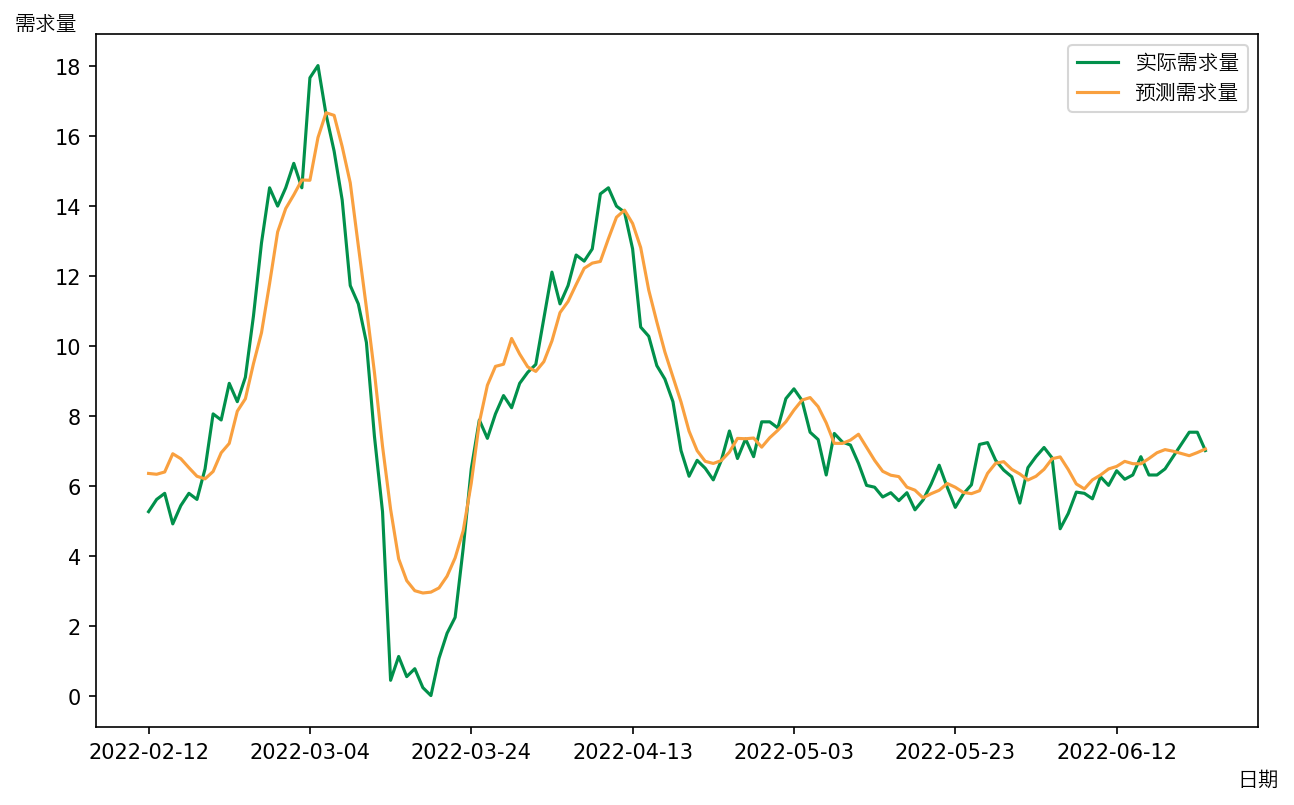

In [51]:
plt.figure(figsize=(10,6),dpi=150)

ax=plt.gca()
x = np.linspace(0,131,132)

plt.plot(x,data['Real'],label='实际需求量',color='#01904B')
plt.plot(x,data['Predict'],label='预测需求量',color='#F9A03F')

plt.xticks(x, pd.Series(pd.date_range('20220212',periods= 132),dtype='str'))
plt.yticks(np.linspace(0,1,10),[i for i in range(0,20,2)])
ax.set_xlabel('日期',x=1,fontproperties=my_font)
ax.set_ylabel('需求量',y=1,rotation='horizontal',fontproperties=my_font)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(prop=my_font,fontsize='large',loc='best')

plt.savefig('LSTM效果图.jpg')
plt.show()

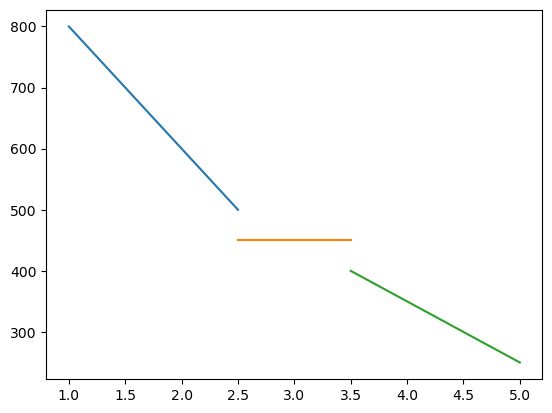

In [7]:
plt.figure()

x1= np.linspace(1,2.5)
x2= np.linspace(2.5,3.5)
x3= np.linspace(3.5, 5)

plt.plot(x1, 1000-200*x1)
plt.plot(x2, [450 for i in range(len(x2))])
plt.plot(x3, 750-100*x3)

plt.show()